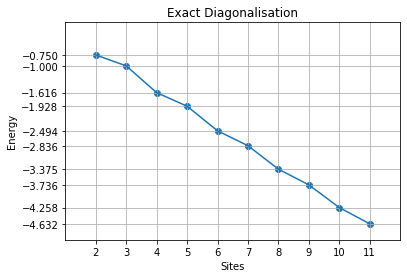

In [1]:
import numpy as np
import scipy.sparse.linalg

# number of iterations.  Final lattice size is NIter + 1
NIter = 10

# local operators

I = np.eye(2)
Sz = np.array([[0.5,  0  ],
             [0  , -0.5]])
Sp = np.array([[0, 0],
               [1, 0]])
Sm = np.array([[0, 1],
             [0, 0]])

BlockSz = Sz
BlockSp = Sp
BlockSm = Sm
BlockI = I
BlockH = np.zeros((2,2))  # Hamiltonian for 1-site system
 
## Begin main iterations

y=[]
rho_t=[]
 
for i in range(0,NIter):
 
    # adding a site to the block
    BlockH = np.kron(BlockH, I) + np.kron(BlockSz, Sz) + 0.5 * (np.kron(BlockSp, Sm) + np.kron(BlockSm, Sp))
    BlockSz = np.kron(BlockI, Sz)
    BlockSp = np.kron(BlockI, Sp)
    BlockSm = np.kron(BlockI, Sm)
    BlockI = np.kron(BlockI, I)
 
    
    # Diagonalize the Hamiltonian
    E,Psi = scipy.sparse.linalg.eigsh(BlockH, k=1, which='SA')
    rho=np.dot(Psi.reshape(BlockH.shape[0],1),Psi.reshape(1,BlockH.shape[0]))
    Energy = E[0]
    y.append(E[0])
    rho_t=rho

import matplotlib.pyplot as plt
axes=plt.axes()
plt.plot([2,3,4,5,6,7,8,9,10,11],y)
plt.scatter([2,3,4,5,6,7,8,9,10,11],y)
plt.xlabel("Sites")
plt.ylabel("Energy")
plt.axis([1,12,-5,0])
axes.set_xticks([2,3,4,5,6,7,8,9,10,11])
axes.set_yticks(y)
plt.title("Exact Diagonalisation")
plt.grid()
plt.show()

# Measurement 

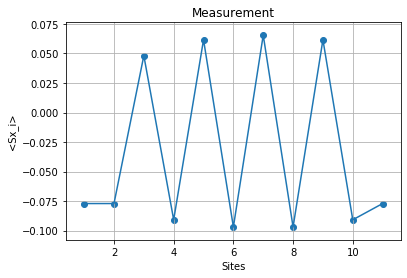

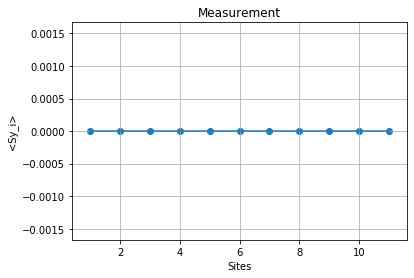

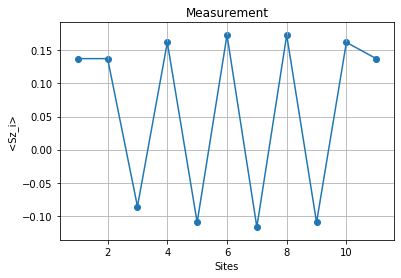

In [2]:
sx=np.array([[0,0.5],[0.5,0]])
SY=np.array([[0,-0.5j],[0.5j,0]])
sz=np.array([[0.5,0],[0,-0.5]])
szsz=np.kron(sz,sz)

def S(sx,i,L):
    if i==0:
        s=np.kron(sx,np.eye(2**(L-1)))
    elif i==L-1:
        s=np.kron(np.eye(2**(L-1)),sx)
    elif 0<i and i<L:
        s=np.kron(np.eye(2**(i-1)),np.kron(sx,np.eye(2**(L-i))))
        
    return s




resx=[]
resy=[]
resz=[]

for i in range(NIter+1):
    cx=np.trace(np.dot(rho_t,S(sx,i,11)))
    cy=np.trace(np.dot(rho_t,S(SY,i,11)))
    cz=np.trace(np.dot(rho_t,S(sz,i,11)))
    resx.append(cx.real)
    resy.append(cy.real)
    resz.append(cz)


import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6,7,8,9,10,11],resx)
plt.scatter([1,2,3,4,5,6,7,8,9,10,11],resx)
plt.xlabel("Sites")
plt.ylabel("<Sx_i>")
axes.set_xticks([1,2,3,4,5,6,7,8,9,10,11])
axes.set_yticks(resx)
plt.title("Measurement")
plt.grid()
plt.show()

plt.plot([1,2,3,4,5,6,7,8,9,10,11],resy)
plt.scatter([1,2,3,4,5,6,7,8,9,10,11],resy)
plt.xlabel("Sites")
plt.ylabel("<Sy_i>")
axes.set_xticks([1,2,3,4,5,6,7,8,9,10,11])
axes.set_yticks(resy)
plt.title("Measurement")
plt.grid()
plt.show()

plt.plot([1,2,3,4,5,6,7,8,9,10,11],resz)
plt.scatter([1,2,3,4,5,6,7,8,9,10,11],resz)
plt.xlabel("Sites")
plt.ylabel("<Sz_i>")
axes.set_xticks([1,2,3,4,5,6,7,8,9,10,11])
axes.set_yticks(resz)
plt.title("Measurement")
plt.grid()
plt.show()

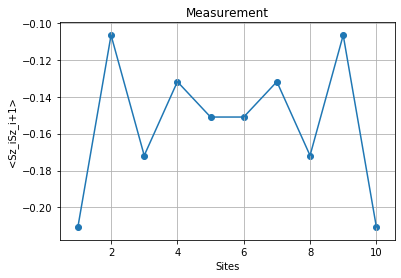

In [3]:
reszz=[]
def S2(sx,i,L):
    if i==0:
        s=np.kron(sx,np.eye(2**(L-2)))
    elif i==L-1:
        s=np.kron(np.eye(2**(L-2)),sx)
    elif 0<i and i<(L-1):
        s=np.kron(np.eye(2**i),np.kron(sx,np.eye(int(2**(L-i-2)))))
        
    return s

for i in range(NIter):
    czz=np.trace(np.dot(rho_t,S2(szsz,i,11)))
    reszz.append(czz)

plt.plot([1,2,3,4,5,6,7,8,9,10],reszz)
plt.scatter([1,2,3,4,5,6,7,8,9,10],reszz)
plt.xlabel("Sites")
plt.ylabel("<Sz_iSz_i+1>")
plt.title("Measurement")
plt.grid()
plt.show()